In [1]:
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel('social_data.xlsx')
data.head(20)

,Published Date,Account,Account Type,Campaign Name,Total Impressions,Total Engagements,Media Type
0,2023-03-31 19:55:43.192,CSGO,TWITTER,N/A,0,0,Text
1,2023-03-31 19:49:35.243,CSGO,TWITTER,N/A,0,0,Text
2,2023-03-31 19:49:33.535,CSGO,TWITTER,N/A,0,0,Text
3,2023-03-31 19:49:31.583,CSGO,TWITTER,N/A,0,0,Text
4,2023-03-31 19:43:42.590,CSGO,TWITTER,Community Engagement,9517,1215,Video
5,2023-03-31 19:42:11.331,CSGO,TWITTER,N/A,0,0,Photo
6,2023-03-31 19:40:57.383,CSGO,TWITTER,Community Engagement,1882,83,Photo
7,2023-03-31 19:23:57.349,CSGO,TWITTER,Community Engagement,17892,3076,Video
8,2023-03-31 19:15:14.431,CSGO,TWITTER,N/A,0,0,Video
9,2023-03-31 18:55:51.855,CSGO,TWITTER,Community Engagement,13874,1447,Video


### Checking for nan values

In [3]:
data.isna().sum()

Published Date       0
Account              0
Account Type         0
Campaign Name        0
Total Impressions    0
Total Engagements    0
Media Type           0
dtype: int64

### Data Cleaning
- Saw Account had 'General' and 'General ', combined them together since 'General' had LINKEDIN_COMPANY tag.

In [4]:
data['Account'].value_counts()

General             2271
DOTA2                803
CSGO                 270
Valorant              60
Content Creators      53
General               22
Name: Account, dtype: int64

In [5]:
print(data[data['Account']=='General ']['Account Type'].value_counts())
print(data[data['Account']=='General']['Account Type'].value_counts())
data['Account'] = data['Account'].replace('General ', 'General')

TWITTER            886
INSTAGRAM          588
FBPAGE             585
TIKTOK_BUSINESS    113
YOUTUBE             99
Name: Account Type, dtype: int64
LINKEDIN_COMPANY    22
Name: Account Type, dtype: int64


### Engagement Rate
$$Engagement\ Rate = \frac{Total\ Engagements}{Total\ Impressions} * 100$$

In [6]:
data['Engagement Rate'] = data.apply(lambda r:r['Total Engagements']/(r['Total Impressions'])*100 if r['Total Impressions'] != 0 else 0, axis=1)
data

,Published Date,Account,Account Type,Campaign Name,Total Impressions,Total Engagements,Media Type,Engagement Rate
0,2023-03-31 19:55:43.192,CSGO,TWITTER,N/A,0,0,Text,0.000000
1,2023-03-31 19:49:35.243,CSGO,TWITTER,N/A,0,0,Text,0.000000
2,2023-03-31 19:49:33.535,CSGO,TWITTER,N/A,0,0,Text,0.000000
3,2023-03-31 19:49:31.583,CSGO,TWITTER,N/A,0,0,Text,0.000000
4,2023-03-31 19:43:42.590,CSGO,TWITTER,Community Engagement,9517,1215,Video,12.766628
...,...,...,...,...,...,...,...,...
3474,2023-01-03 10:35:12.652,CSGO,TWITTER,N/A,0,0,Link,0.000000
3475,2023-01-03 10:34:55.487,CSGO,TWITTER,N/A,0,0,Link,0.000000
3476,2023-01-03 10:34:38.631,CSGO,TWITTER,N/A,0,0,Link,0.000000
3477,2023-01-03 10:34:03.438,CSGO,TWITTER,N/A,2116,42,Text,1.984877


### Checking for Outliers

|Index|Impression|Engagement|
|---|---|---|
|837|1|940|
|3457|300|3776|
|3216|5|44|
|1586|1|1|

In [7]:
data.iloc[[837,3457,3216,1586],:]

,Published Date,Account,Account Type,Campaign Name,Total Impressions,Total Engagements,Media Type,Engagement Rate
837,2023-03-10 12:37:06,General,FBPAGE,N/A,1,940,Photo,94000.000000
3457,2023-01-05 11:55:44,General,FBPAGE,N/A,300,3776,Photo,1258.666667
3216,2023-01-19 06:02:34,General,FBPAGE,N/A,5,44,Photo,880.000000
1586,2023-02-23 06:18:27,General,FBPAGE,N/A,1,1,Photo,100.000000


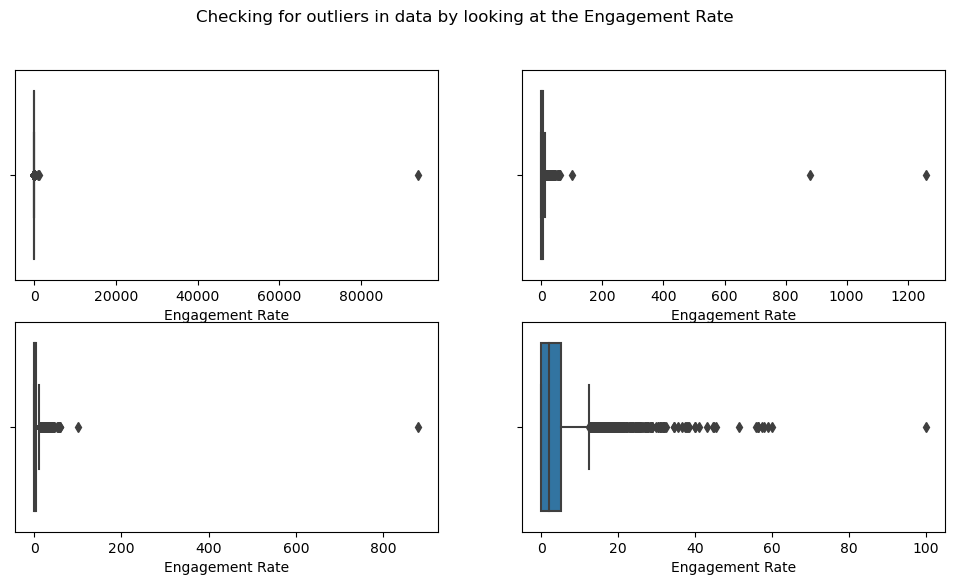

In [8]:
fig, ax = plt.subplots(2,2, figsize=(12,6))
fig.suptitle('Checking for outliers in data by looking at the Engagement Rate')
sns.boxplot(x=data['Engagement Rate'], ax=ax[0][0])
data = data.drop(837).reset_index(drop=True)
sns.boxplot(x=data['Engagement Rate'], ax=ax[0][1])
data = data.drop(3456).reset_index(drop=True)
sns.boxplot(x=data['Engagement Rate'], ax=ax[1][0])
data = data.drop(3215).reset_index(drop=True)
sns.boxplot(x=data['Engagement Rate'], ax=ax[1][1])
data = data.drop(1585).reset_index(drop=True)
plt.savefig("figs/0 outliers.png")
plt.show()

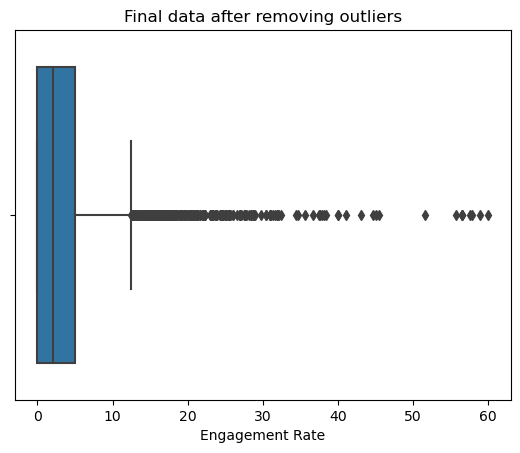

In [9]:
# final
plt.title('Final data after removing outliers')
sns.boxplot(x=data['Engagement Rate'])
plt.savefig("figs/0 final_eng_rate.png")
plt.show()

##### 1. What is the typical engagment rate we can expect? What's the likelihood that we can achieve a 15% engagement rate?

In [10]:
data.describe()

,Total Impressions,Total Engagements,Engagement Rate
count,3475.000000,3475.000000,3475.000000
mean,10984.995396,947.111079,4.175152
std,29591.818356,3470.221546,6.538214
min,0.000000,0.000000,0.000000
25%,169.000000,0.000000,0.000000
50%,1888.000000,38.000000,2.038835
75%,12469.000000,276.000000,5.000000
max,753227.000000,95062.000000,60.000000


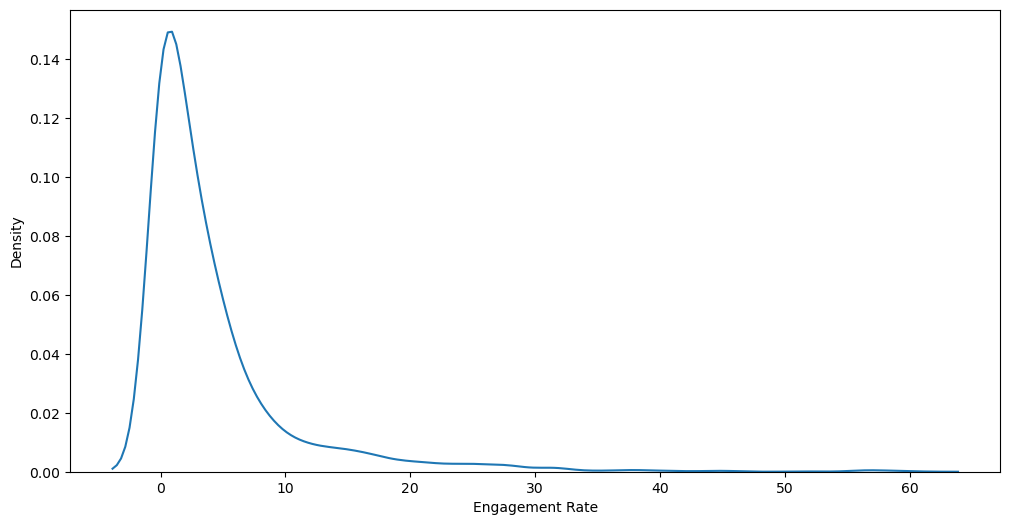

In [11]:
plt.figure(figsize=(12,6))
sns.kdeplot(x = data['Engagement Rate'])
plt.savefig("figs/1 data_dist.png")
plt.show()

##### 2. Does day of the week and time of posting affect engagement rates?

In [12]:
weekdays = {1: "Monday",
            2: "Tuesday",
            3: "Wednesday",
            4: "Thursday",
            5: "Friday",
            6: "Saturday",
            7: "Sunday"}
data['Day Of Week'] = data.apply(lambda r:weekdays[r['Published Date'].isoweekday()], axis=1)
data

,Published Date,Account,Account Type,Campaign Name,Total Impressions,Total Engagements,Media Type,Engagement Rate,Day Of Week
0,2023-03-31 19:55:43.192,CSGO,TWITTER,N/A,0,0,Text,0.000000,Friday
1,2023-03-31 19:49:35.243,CSGO,TWITTER,N/A,0,0,Text,0.000000,Friday
2,2023-03-31 19:49:33.535,CSGO,TWITTER,N/A,0,0,Text,0.000000,Friday
3,2023-03-31 19:49:31.583,CSGO,TWITTER,N/A,0,0,Text,0.000000,Friday
4,2023-03-31 19:43:42.590,CSGO,TWITTER,Community Engagement,9517,1215,Video,12.766628,Friday
...,...,...,...,...,...,...,...,...,...
3470,2023-01-03 10:35:12.652,CSGO,TWITTER,N/A,0,0,Link,0.000000,Tuesday
3471,2023-01-03 10:34:55.487,CSGO,TWITTER,N/A,0,0,Link,0.000000,Tuesday
3472,2023-01-03 10:34:38.631,CSGO,TWITTER,N/A,0,0,Link,0.000000,Tuesday
3473,2023-01-03 10:34:03.438,CSGO,TWITTER,N/A,2116,42,Text,1.984877,Tuesday


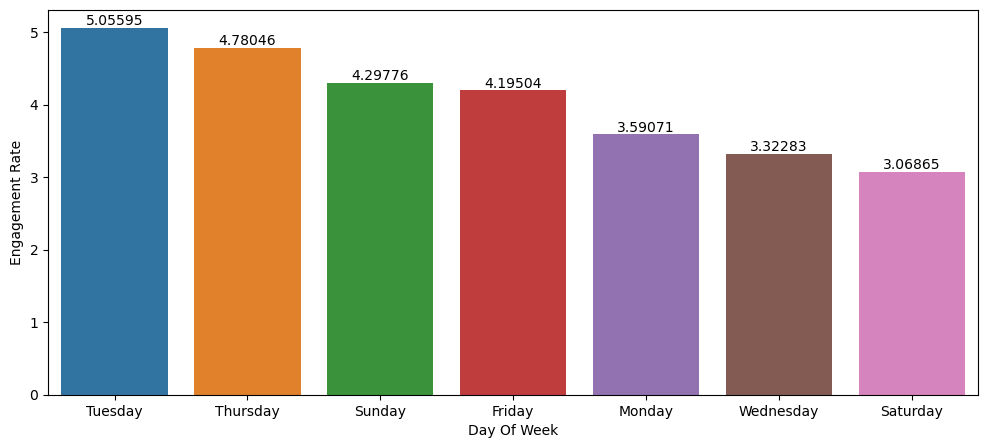

In [13]:
day_data = data.groupby('Day Of Week').mean(numeric_only=True).sort_values(by = 'Engagement Rate', ascending=False)
fig2, ax2 = plt.subplots(figsize=(12,5))
ax2 = sns.barplot(x=day_data.index, y=day_data['Engagement Rate'])
for i in ax2.containers:
    ax2.bar_label(i,)
plt.savefig("figs/2 day of week.png")
plt.show()

In [14]:
data['Time Of Day'] = pd.cut(
    pd.to_datetime(data['Published Date']).dt.hour,
    bins=[0, 6, 12, 18, 24],
    labels=['Night', 'Morning', 'Afternoon', 'Evening'],
    right=False,
    include_lowest=True
)

data

,Published Date,Account,Account Type,Campaign Name,Total Impressions,Total Engagements,Media Type,Engagement Rate,Day Of Week,Time Of Day
0,2023-03-31 19:55:43.192,CSGO,TWITTER,N/A,0,0,Text,0.000000,Friday,Evening
1,2023-03-31 19:49:35.243,CSGO,TWITTER,N/A,0,0,Text,0.000000,Friday,Evening
2,2023-03-31 19:49:33.535,CSGO,TWITTER,N/A,0,0,Text,0.000000,Friday,Evening
3,2023-03-31 19:49:31.583,CSGO,TWITTER,N/A,0,0,Text,0.000000,Friday,Evening
4,2023-03-31 19:43:42.590,CSGO,TWITTER,Community Engagement,9517,1215,Video,12.766628,Friday,Evening
...,...,...,...,...,...,...,...,...,...,...
3470,2023-01-03 10:35:12.652,CSGO,TWITTER,N/A,0,0,Link,0.000000,Tuesday,Morning
3471,2023-01-03 10:34:55.487,CSGO,TWITTER,N/A,0,0,Link,0.000000,Tuesday,Morning
3472,2023-01-03 10:34:38.631,CSGO,TWITTER,N/A,0,0,Link,0.000000,Tuesday,Morning
3473,2023-01-03 10:34:03.438,CSGO,TWITTER,N/A,2116,42,Text,1.984877,Tuesday,Morning


,Total Impressions,Total Engagements,Engagement Rate,Count
Time Of Day,,,,
Night,10147.729167,2071.604167,7.876963,48
Morning,12467.673352,1033.527221,4.363287,1396
Afternoon,10284.404525,884.007174,4.017833,1812
Evening,7513.949772,671.913242,3.466193,219


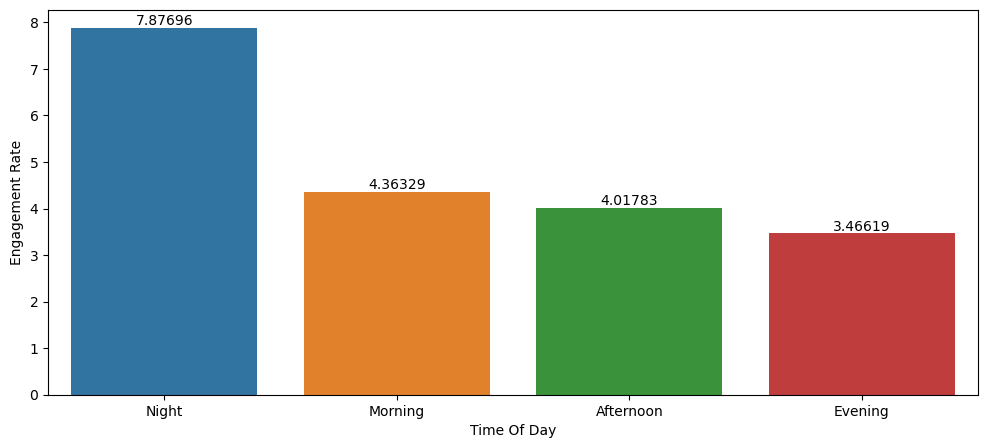

In [15]:
time_data = data.groupby('Time Of Day').mean(numeric_only=True).sort_values(by = 'Engagement Rate', ascending=False)
time_data['Count'] = data['Time Of Day'].value_counts()
display(time_data)
fig3, ax3 = plt.subplots(figsize=(12,5))
ax3 = sns.barplot(x=time_data.index, y=time_data['Engagement Rate'])
for i in ax3.containers:
    ax3.bar_label(i,)
plt.savefig("figs/2 time of day.png")
plt.show()

##### 3. How are our game titles doing in terms of social performance? Is there a specific game we should focus more on or less?

In [16]:
data['Account'].value_counts()

General             2289
DOTA2                803
CSGO                 270
Valorant              60
Content Creators      53
Name: Account, dtype: int64

,Total Impressions,Total Engagements,Engagement Rate,Count
Account,,,,
General,14823.700306,1342.318480,4.299421,2289
DOTA2,2315.474471,154.408468,4.298295,803
Content Creators,852.566038,26.169811,4.075632,53
CSGO,8570.066667,341.985185,3.030547,270
Valorant,382.983333,15.516667,3.024861,60


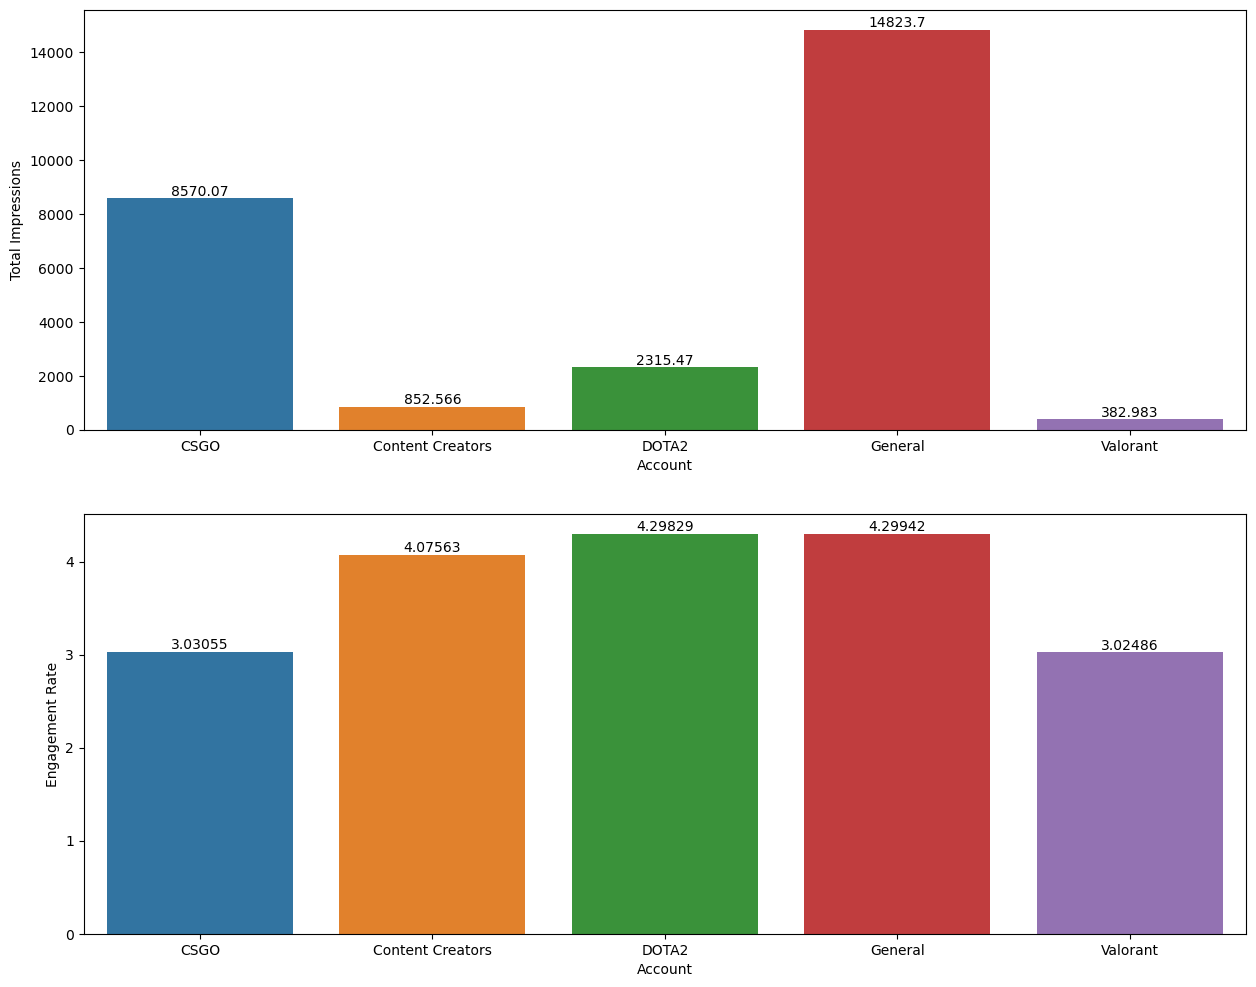

In [17]:
game_data = data.groupby('Account').mean(numeric_only=True)
game_data['Count'] = data['Account'].value_counts()
display(game_data.sort_values(by='Engagement Rate', ascending=False))

fig4, ax4 = plt.subplots(2, figsize=(15,12))
ax_x = sns.barplot(x=game_data.index, y=game_data['Total Impressions'], ax=ax4[0])
for i in ax_x.containers:
    ax_x.bar_label(i,)
ax_y = sns.barplot(x=game_data.index, y=game_data['Engagement Rate'], ax=ax4[1])
for i in ax_y.containers:
    ax_y.bar_label(i,)
plt.savefig("figs/3 game type.png")
plt.show()

##### 4. Which media type performs the best?

In [18]:
data['Media Type'].value_counts()

Photo       1486
Video        967
Text         910
Link          94
Carousel       9
Mixed          5
Album          4
Name: Media Type, dtype: int64

,Total Impressions,Total Engagements,Engagement Rate,Count
Media Type,,,,
Mixed,36996.800000,2732.800000,10.770357,5
Album,5.000000,2.000000,10.000000,4
Video,10956.373320,888.780765,4.903493,967
Photo,16079.195828,1455.570659,4.877078,1486
Carousel,17854.333333,726.777778,3.784294,9
Text,3413.409890,270.672527,2.459318,910
Link,2473.031915,24.010638,1.635631,94


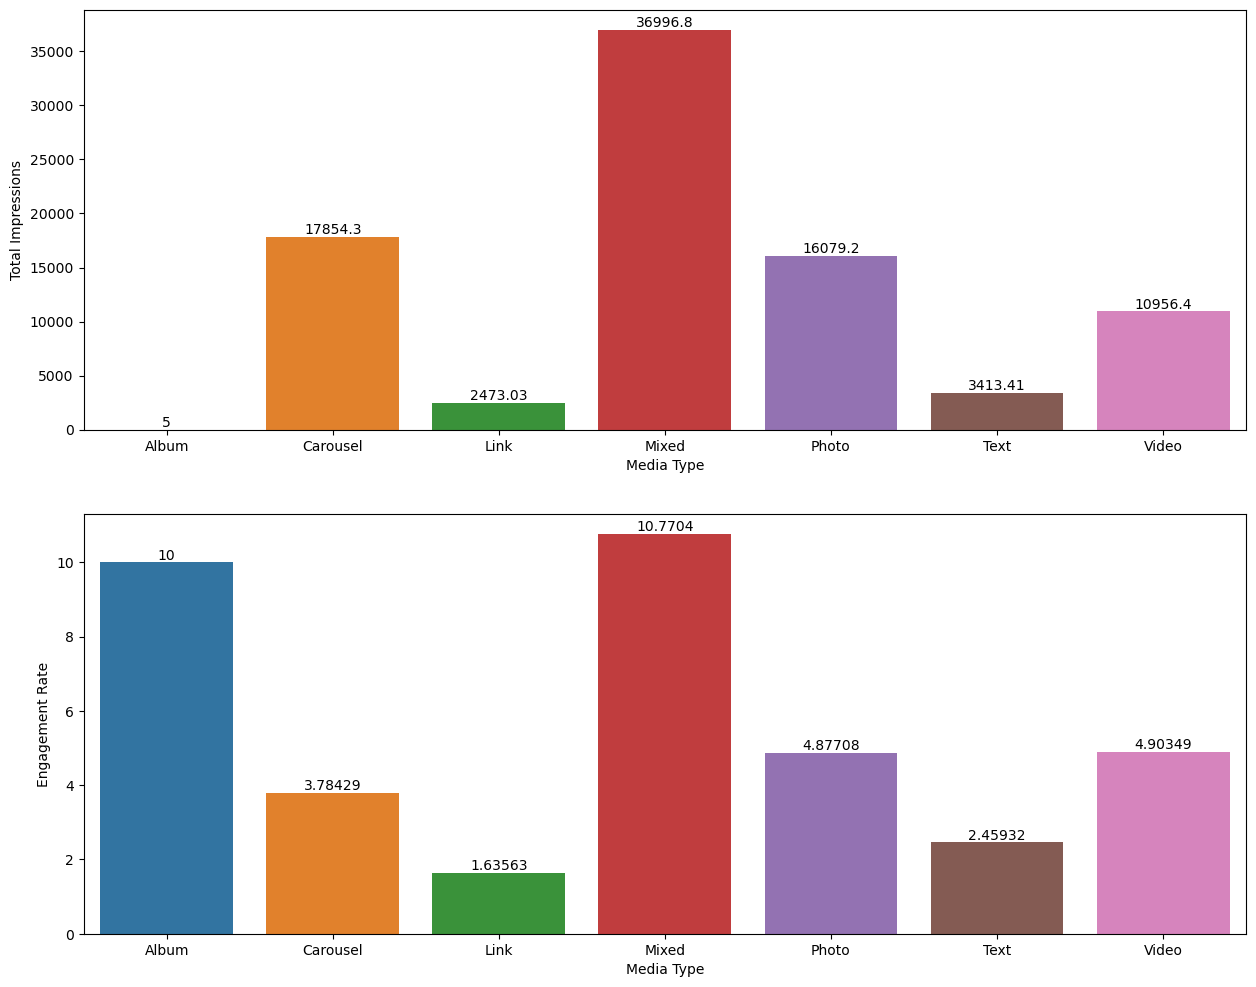

In [19]:
media_data = data.groupby('Media Type').mean(numeric_only=True)
media_data['Count'] = data['Media Type'].value_counts()
# thinking of dropping album as there are too few impressions to judge the engagement
# media_data = media_data.drop('Album')
display(media_data.sort_values(by='Engagement Rate', ascending=False))

fig5, ax5 = plt.subplots(2, figsize=(15,12))
ax_x = sns.barplot(x=media_data.index, y=media_data['Total Impressions'], ax=ax5[0])
for i in ax_x.containers:
    ax_x.bar_label(i,)
ax_y = sns.barplot(x=media_data.index, y=media_data['Engagement Rate'], ax=ax5[1])
for i in ax_y.containers:
    ax_y.bar_label(i,)
plt.savefig("figs/4 media type.png")
plt.show()

##### 5. What is our best performing campaign?

In [20]:
data['Campaign Name'].value_counts()

N/A                      1481
Community Engagement     1411
Evil Exhibited            420
Evergreen                 163
Name: Campaign Name, dtype: int64

,Total Impressions,Total Engagements,Engagement Rate,Count
Campaign Name,,,,
Community Engagement,16870.131821,1449.161588,5.634547,1411
Evergreen,8151.711656,264.582822,3.467474,163
N/A,4927.602296,687.381499,3.286123,1481
Evil Exhibited,13672.845238,441.202381,2.681813,420


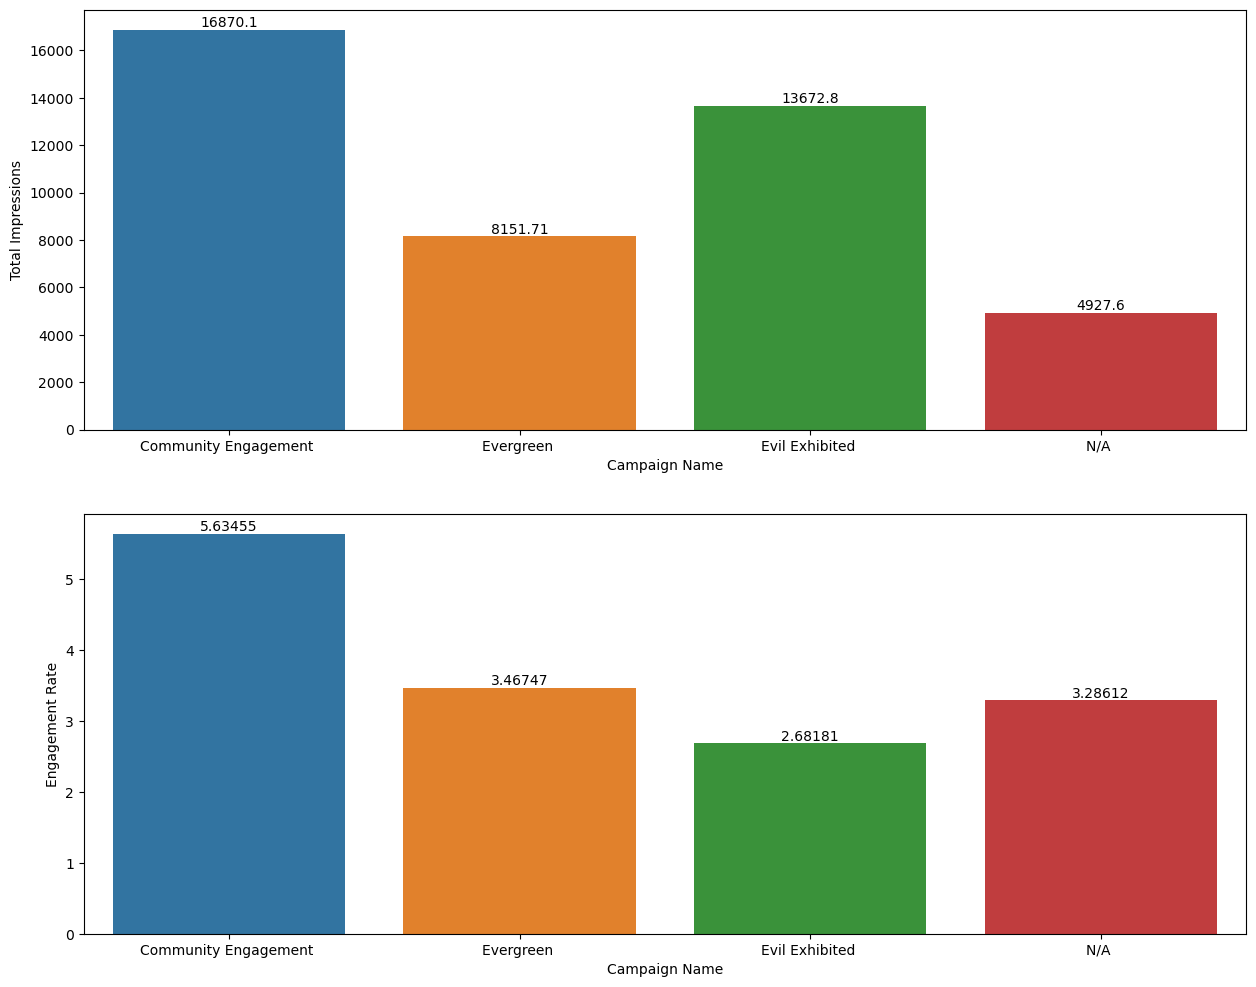

In [21]:
camp_data = data.groupby('Campaign Name').mean(numeric_only=True)
camp_data['Count'] = data['Campaign Name'].value_counts()
display(camp_data.sort_values(by='Engagement Rate', ascending=False))

fig6, ax6 = plt.subplots(2, figsize=(15,12))
ax_x = sns.barplot(x=camp_data.index, y=camp_data['Total Impressions'], ax=ax6[0])
for i in ax_x.containers:
    ax_x.bar_label(i,)
ax_y = sns.barplot(x=camp_data.index, y=camp_data['Engagement Rate'], ax=ax6[1])
for i in ax_y.containers:
    ax_y.bar_label(i,)
plt.savefig("figs/5 campaign type.png")
plt.show()

##### Suggestions

In [22]:
data['Account Type'].value_counts()

TWITTER             1951
INSTAGRAM            588
FBPAGE               581
YOUTUBE              220
TIKTOK_BUSINESS      113
LINKEDIN_COMPANY      22
Name: Account Type, dtype: int64

In [23]:
data[data['Account Type'] == 'TWITTER']['Account'].value_counts()

General    886
DOTA2      795
CSGO       270
Name: Account, dtype: int64

In [24]:
data[data['Account Type'] == 'TWITTER'].describe()

,Total Impressions,Total Engagements,Engagement Rate
count,1951.000000,1951.000000,1951.000000
mean,9995.179908,309.871348,3.248994
std,30932.154371,974.696962,3.713681
min,0.000000,0.000000,0.000000
25%,423.000000,9.000000,0.877716
50%,1649.000000,51.000000,2.248996
75%,10560.000000,223.500000,4.496582
max,452337.000000,12348.000000,60.000000


In [25]:
data[(data['Account Type'] == 'TWITTER')&(data['Account']=='DOTA2')].describe()

,Total Impressions,Total Engagements,Engagement Rate
count,795.000000,795.000000,795.000000
mean,2252.592453,150.174843,4.310028
std,4075.260349,352.918074,3.934699
min,0.000000,0.000000,0.000000
25%,400.000000,7.000000,1.537387
50%,1013.000000,34.000000,3.540813
75%,2423.000000,132.000000,5.921992
max,39432.000000,4465.000000,25.389466


In [26]:
data[(data['Account Type'] == 'TWITTER')&(data['Account']=='CSGO')].describe()

,Total Impressions,Total Engagements,Engagement Rate
count,270.000000,270.000000,270.000000
mean,8570.066667,341.985185,3.030547
std,36832.498876,1162.159415,3.868445
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,1501.500000,23.500000,1.759788
75%,3276.000000,113.000000,3.452529
max,445130.000000,10909.000000,17.192041


In [27]:
data[data['Account Type'] == 'YOUTUBE']['Account'].value_counts()

General             99
Valorant            60
Content Creators    53
DOTA2                8
Name: Account, dtype: int64

In [28]:
data[data['Account Type'] == 'YOUTUBE'].describe()

,Total Impressions,Total Engagements,Engagement Rate
count,220.000000,220.000000,220.000000
mean,1083.650000,46.945455,3.048881
std,4570.975006,299.680190,4.102267
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,306.000000,9.500000,2.569124
75%,971.750000,35.000000,4.335485
max,64879.000000,4388.000000,37.931034


In [29]:
data[(data['Account Type']=='YOUTUBE')&(data['Account']=='Content Creators')].describe()

,Total Impressions,Total Engagements,Engagement Rate
count,53.000000,53.000000,53.000000
mean,852.566038,26.169811,4.075632
std,1245.170663,33.082494,6.827298
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,150.000000,11.000000,2.478134
75%,1676.000000,45.000000,4.460967
max,5685.000000,130.000000,37.931034


In [30]:
data[(data['Account Type']=='YOUTUBE')&(data['Account']=='Valorant')].describe()

,Total Impressions,Total Engagements,Engagement Rate
count,60.000000,60.000000,60.000000
mean,382.983333,15.516667,3.024861
std,1598.664522,60.028381,3.581828
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,27.000000,1.500000,2.092041
75%,300.750000,13.250000,5.152596
max,12320.000000,463.000000,14.285714


In [31]:
data[(data['Account Type']=='YOUTUBE')&(data['Account']=='DOTA2')].describe()

,Total Impressions,Total Engagements,Engagement Rate
count,8.000000,8.000000,8.000000
mean,8564.375000,575.125000,3.132272
std,22766.137579,1541.164165,3.429655
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,345.500000,18.500000,2.651696
75%,1162.250000,76.500000,5.712579
max,64879.000000,4388.000000,7.629108


##### Calculating the likelihood for a non-normal distribution

In [37]:
import numpy as np
from scipy import stats

def compute_likelihood(data, threshold):
    ecdf = stats.cumfreq(data, numbins=1000000)
    x = ecdf.lowerlimit + np.linspace(0, ecdf.binsize*ecdf.cumcount.size, ecdf.cumcount.size)
    idx = np.searchsorted(x, threshold, side='right')
    likelihood = 1 - ecdf.cumcount[idx]/len(data)
    return likelihood

# suppose your engagement rate data looks like this:
engagement_data = np.array(data.loc[:,'Engagement Rate'])  # replace [...] with your real data

# you want to find the likelihood of achieving at least 15% engagement rate
threshold = 15

likelihood = compute_likelihood(engagement_data, threshold)
print(f'The likelihood of achieving at least a {threshold}% engagement rate is {likelihood*100}%')

The likelihood of achieving at least a 15% engagement rate is 6.388489208633096%


##### Extra